# Feature Selection

- Feature selection is the process of choosing the most relevant features (input variables) from your dataset that contribute the most to predicting the target variable.
- We remove irrelevant/redundant features
- It’s different from feature extraction (like PCA), which creates new transformed features rather than selecting existing ones.

### Why its done:
- It is implemented to reduce overfitting
- It improves the training speed and increases accuracy

# Types of Feature Selection Methods

## 1) Filter Methods
- They work by applying statistical tests to measure the corerlation or relevance of each feature to the target variable
- Features are ranked and selected based on scores like correlation, mutual information, chi-square, etc
- This works well as a pre-processing step before modelling
- This method ignores considering each feature individually on its own merit

## 2) Wrapper Methods
- Treats feature selection as a search problem
- We train different models on different subsets of the data and evaluate the model performance for each subset
- The goal is to find the optimal subset of features that gives the best preditive performance
- This is computationally very expensive and may overfit on small datasets

### Common Techniques:
- Forward Selection → start with no features, add one at a time
- Backward Elimination → start with all features, remove one at a time
- Recursive Feature Elimination (RFE) → iteratively train a model, remove least important features

## 3) Embedded Models
- Feature selection takes place during model training
- The model learns which features are most important using weights, regularization or built in feature importance

### Common Techniques
- Lasso Regression (L1 regularization) → shrinks some coefficients to zero, effectively removing them
- Ridge Regression (L2 regularization) → reduces weight but doesn’t remove features
- Decision Trees / Random Forest / XGBoost feature importance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
%pip install feature_engine
from feature_engine.selection import DropConstantFeatures

    click (>=7.0<=8.1.*)
          ~~~~~~^

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\meetb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached feature_engine-1.9.3-py3-none-any.whl.metadata (10 kB)
Using cached feature_engine-1.9.3-py3-none-any.whl (229 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
data = pd.read_csv('./data/dataset_1.csv')
data.head()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [15]:
x = data.drop('target', axis=1)
y = data['target']

# Number of features before removing constant features
print(f'Number of features before removing constant features: {x.shape[1]}')

# tol hyperparameter is used to set the threshold for identifying constant features
# tol=0 means only features with the same value in all observations will be removed
# tol=0.01 means features with 99% or more of the same value will be removed
se = DropConstantFeatures()
x_transformed = se.fit_transform(x)
# Number of features after removing constant features
print(f'Number of features after removing constant features: {x_transformed.shape[1]}')


Number of features before removing constant features: 300
Number of features after removing constant features: 267


In [17]:
# Setting threshold to 0.9 to remove quasi-constant features
se = DropConstantFeatures(tol=0.9)
x_transformed = se.fit_transform(x)
# Number of features after removing quasi-constant features
print(f'Number of features after removing quasi-constant features: {x_transformed.shape[1]}')
# Checking if the removed features are indeed quasi-constant
removed_features = list(set(x.columns) - set(x_transformed.columns))
print(f'Removed features: {removed_features}')
# Checking the percentage of the most frequent value in the removed features
for feature in removed_features:
    most_frequent = x[feature].value_counts(normalize=True).max()
    print(f'Feature: {feature}, Most frequent value percentage: {most_frequent}')

Number of features after removing quasi-constant features: 50
Removed features: ['var_33', 'var_282', 'var_112', 'var_229', 'var_248', 'var_134', 'var_219', 'var_163', 'var_244', 'var_101', 'var_258', 'var_197', 'var_78', 'var_28', 'var_116', 'var_294', 'var_45', 'var_232', 'var_247', 'var_177', 'var_195', 'var_165', 'var_237', 'var_226', 'var_274', 'var_130', 'var_264', 'var_260', 'var_153', 'var_3', 'var_241', 'var_10', 'var_58', 'var_235', 'var_99', 'var_2', 'var_233', 'var_109', 'var_61', 'var_95', 'var_245', 'var_59', 'var_96', 'var_63', 'var_200', 'var_168', 'var_30', 'var_159', 'var_119', 'var_204', 'var_291', 'var_105', 'var_70', 'var_162', 'var_236', 'var_239', 'var_238', 'var_202', 'var_143', 'var_263', 'var_107', 'var_180', 'var_249', 'var_34', 'var_206', 'var_280', 'var_1', 'var_47', 'var_228', 'var_300', 'var_108', 'var_171', 'var_42', 'var_97', 'var_252', 'var_53', 'var_176', 'var_243', 'var_124', 'var_36', 'var_54', 'var_137', 'var_224', 'var_290', 'var_25', 'var_65', 'v

## Data Pre-processing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv('./data/StressLevelDataset.csv')
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [8]:
# Checking for missing values
data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

## Classifying Stress Lavel using Random Forest on Original data

[[68  4  4]
 [ 6 63  4]
 [ 7  3 61]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



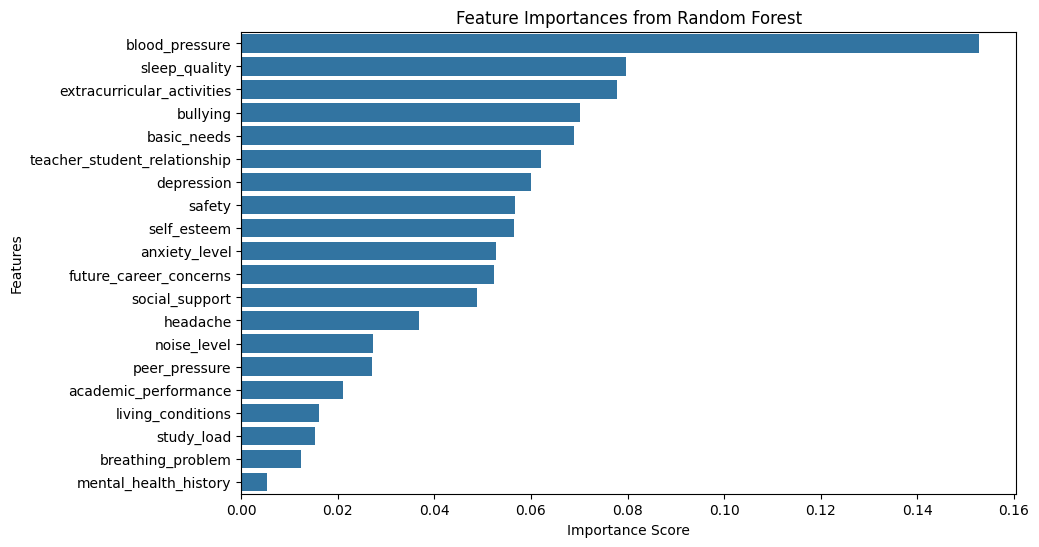

In [9]:
# Classification using Random Forest on Original data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = data.drop('stress_level', axis=1)
y = data['stress_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Univariate Feature Selection

In [10]:
# Implemeting Univariate Feature Selection using SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f'Selected features: {selected_features}')
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
rf_new = RandomForestClassifier(random_state=42)
rf_new.fit(X_train_new, y_train)
y_pred_new = rf_new.predict(X_test_new)
print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))
# Comparing the performance of Random Forest on original data vs selected features
print("Performance on Original Data:")
print(classification_report(y_test, y_pred))


Selected features: Index(['self_esteem', 'blood_pressure', 'sleep_quality',
       'future_career_concerns', 'bullying'],
      dtype='object')
[[70  4  2]
 [ 5 65  3]
 [ 4  4 63]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        76
           1       0.89      0.89      0.89        73
           2       0.93      0.89      0.91        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220

Performance on Original Data:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



## Recursive Feature Elimination

In [11]:
# Implementing Feature Selection using RFE
from sklearn.feature_selection import RFE
rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.get_support()]
print(f'Selected features using RFE: {selected_features_rfe}')
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
rf_rfe = RandomForestClassifier(random_state=42)
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = rf_rfe.predict(X_test_rfe)
print(confusion_matrix(y_test, y_pred_rfe))
print(classification_report(y_test, y_pred_rfe))
# Comparing the performance of Random Forest on original data vs RFE selected features
print("Performance on Original Data:")
print(classification_report(y_test, y_pred))
# Comparing the performance of Random Forest on original data vs selected features
print("Performance on Original Data:")
print(classification_report(y_test, y_pred))
print("Performance on Selected Features:")
print(classification_report(y_test, y_pred_new))

Selected features using RFE: Index(['depression', 'blood_pressure', 'sleep_quality', 'safety',
       'academic_performance'],
      dtype='object')
[[67  1  8]
 [ 5 64  4]
 [ 5  3 63]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        76
           1       0.94      0.88      0.91        73
           2       0.84      0.89      0.86        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

Performance on Original Data:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

Performance on Origina

## L1 based Feature Selection

In [12]:
# Make sure X and y are defined
X = data.drop('stress_level', axis=1)
y = data['stress_level']

# Implementing L1 based Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
selector_l1 = SelectFromModel(estimator=log_reg)
X_l1 = selector_l1.fit_transform(X, y)
selected_features_l1 = X.columns[selector_l1.get_support()]
print(f'Selected features using L1 based selection: {selected_features_l1}')
X_train_l1, X_test_l1, y_train, y_test = train_test_split(X_l1, y, test_size=0.2, random_state=42)
rf_l1 = RandomForestClassifier(random_state=42)
rf_l1.fit(X_train_l1, y_train)
y_pred_l1 = rf_l1.predict(X_test_l1)
print(confusion_matrix(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l1))
# Comparing the performance of Random Forest on original data vs L1 selected features
print("Performance on Original Data:")
print(classification_report(y_test, y_pred))
print("Performance on L1 Selected Features:")
print(classification_report(y_test, y_pred_l1))


Selected features using L1 based selection: Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying'],
      dtype='object')
[[68  4  4]
 [ 6 63  4]
 [ 7  3 61]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

Performance on Original Data:
              precision    recall  f1-score   support

           0   

## Tree Based Feature Selection

In [14]:
# Implementing Tree based Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
rf = RandomForestClassifier(random_state=42)
selector_tree = SelectFromModel(estimator=rf, threshold='median')
X_tree = selector_tree.fit_transform(X, y)
selected_features_tree = X.columns[selector_tree.get_support()]
print(f'Selected features using Tree based selection: {selected_features_tree}')
X_train_tree, X_test_tree, y_train, y_test = train_test_split(X_tree, y, test_size=0.2, random_state=42)
rf_tree = RandomForestClassifier(random_state=42)
rf_tree.fit(X_train_tree, y_train)
y_pred_tree = rf_tree.predict(X_test_tree)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
# Comparing the performance of Random Forest on original data vs Tree based selected features
print("Performance on Original Data:")
print(classification_report(y_test, y_pred))
print("Performance on Tree Based Selected Features:")
print(classification_report(y_test, y_pred_tree))

Selected features using Tree based selection: Index(['anxiety_level', 'self_esteem', 'depression', 'blood_pressure',
       'sleep_quality', 'safety', 'basic_needs', 'academic_performance',
       'future_career_concerns', 'social_support'],
      dtype='object')
[[70  4  2]
 [ 5 65  3]
 [ 6  6 59]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        76
           1       0.87      0.89      0.88        73
           2       0.92      0.83      0.87        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

Performance on Original Data:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg    